In [2]:
import sys

sys.path.append('/usr/local/lib/python3.10/dist-packages')

import os
!rm -rf /home/g202110550/Extended_dataset/content/drive/MyDrive/Dataset_new/train_data_complex/labels/train/train


In [35]:
import os
os.mkdir("./Clean_with_AWD/labels/")

In [37]:
!cp -r /home/g202110550/New_Com_AWGN_data_test/labels/*.txt ./Clean_with_AWD/labels/

In [15]:
# !git clone https://github.com/ultralytics/yolov5  # clone
%cd /home/g202110550/yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.8.0 torch-2.0.1+cu117 CUDA:0 (NVIDIA RTX A4500, 20178MiB)


Setup complete ✅ (20 CPUs, 125.5 GB RAM, 397.6/1758.9 GB disk)


In [ ]:
##%%% YoloNas %%%%%%%%##
from super_gradients.training import Trainer

In [ ]:
from super_gradients.training import Trainer

CHECKPOINT_DIR = 'checkpoints'
trainer = Trainer(experiment_name='my_first_yolonas_run', ckpt_root_dir=CHECKPOINT_DIR)

In [3]:
from super_gradients.training import dataloaders
from super_gradients.training import Trainer
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val


In [48]:
dataset_params = {
    'data_dir':'/home/g202110550/Extended_dataset/',
#     'data_dir_MB5':'/content/drive/MyDrive/Motion_Blur_5',
    'data_dir_dr':'/home/g202110550/',
#     'data_dir_hv':'/content/heavy',
#     'data_dir_tr':'/content/tor',
#     'data_dir_MB15':'/content/drive/MyDrive/Motion_Blur_15',
#     'data_dir_MB30':'/content/drive/MyDrive/Motion_Blur_30',
    'train_images_dir':'/home/g202110550/Extended_dataset/content/drive/MyDrive/Dataset_new/train_data_complex/images/train',
    'train_labels_dir':'/home/g202110550/Extended_dataset/content/drive/MyDrive/Dataset_new/train_data_complex/labels/train',
    'val_images_dir':'/home/g202110550/Dataset_new/content/drive/MyDrive/Dataset_new/train_data_complex/images/val',
    'val_labels_dir':'/home/g202110550/Dataset_new/content/drive/MyDrive/Dataset_new/train_data_complex/labels/val',
#     'test_images_dr_dir':'/home/g202110550/Rainy_tor_test',
#     'test_labels_dr_dir' : '/home/g202110550/Test_set/labels',
#     'test_images_MB5_dir':'/home/g202110550/Motion_Blur_30_test',
#     'test_labels_MB5_dir':'/home/g202110550/Test_set/labels',
#     'test_images_MB15_dir':'/content/drive/MyDrive/Motion_Blur_15/images/test',
#     'test_labels_MB15_dir':'/content/drive/MyDrive/Motion_Blur_15/labels/test',
#     'test_images_MB30_dir':'/content/drive/MyDrive/Motion_Blur_30/images/test',
#     'test_labels_MB30_dir':'/content/drive/MyDrive/Motion_Blur_30/labels/test',
    'test_images_AWGN2': '/home/g202110550/AWGN_n6_test/content/drive/MyDrive/AWGN_n6/images/test',
    'test_labels_AWGN2': '/home/g202110550/AWGN_n6_test/content/drive/MyDrive/AWGN_n6/labels/test',

    'classes': ['UAV', 'Bird']
}

In [49]:
from IPython.display import clear_output

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

# test_data_dr = coco_detection_yolo_format_val(
#     dataset_params={
#         'data_dir': dataset_params['data_dir_dr'],
#         'images_dir': dataset_params['test_images_dr_dir'],
#         'labels_dir': dataset_params['test_labels_dr_dir'],
#         'classes': dataset_params['classes']
#     },
#     dataloader_params={
#         'batch_size':16,
#         'num_workers':2
#     }
# )

# test_data = coco_detection_yolo_format_val(
#     dataset_params={
#         'data_dir': dataset_params['data_dir_t'],
#         'images_dir': dataset_params['test_images_dir'],
#         'labels_dir': dataset_params['test_labels_dir'],
#         'classes': dataset_params['classes']
#     },
#       dataloader_params={
#         'batch_size':16,
#         'num_workers':2
#     }
# )


test_data_AWGN = coco_detection_yolo_format_val(
dataset_params={
    'data_dir': dataset_params['data_dir_dr'],
    'images_dir': dataset_params['test_images_AWGN2'],
    'labels_dir': dataset_params['test_labels_AWGN2'],
    'classes': dataset_params['classes']
},
  dataloader_params={
    'batch_size':16,
    'num_workers':2
}
)

# test_data_MB = coco_detection_yolo_format_val(
# dataset_params={
#     'data_dir': dataset_params['data_dir_dr'],
#     'images_dir': dataset_params['test_images_MB5_dir'],
#     'labels_dir': dataset_params['test_labels_MB5_dir'],
#     'classes': dataset_params['classes']
# },
#   dataloader_params={
#     'batch_size':16,
#     'num_workers':2
# }
# )

# test_data_hv = coco_detection_yolo_format_val(
# dataset_params={
#     'data_dir': dataset_params['data_dir_hv'],
#     'images_dir': dataset_params['test_hv_img_dir'],
#     'labels_dir': dataset_params['test_hv_lab_dir'],
#     'classes': dataset_params['classes']
# },
#   dataloader_params={
#     'batch_size':16,
#     'num_workers':2
# }
# )

# test_data_tr = coco_detection_yolo_format_val(
# dataset_params={
#     'data_dir': dataset_params['data_dir_tr'],
#     'images_dir': dataset_params['test_tor_img_dir'],
#     'labels_dir': dataset_params['test_tor_lab_dir'],
#     'classes': dataset_params['classes']
# },
# dataloader_params={
#     'batch_size':16,
#     'num_workers':2
# }
# )
clear_output()


Caching annotations: 100%|████████████████████████████████████████████████████████| 2528/2528 [00:00<00:00, 8476.53it/s]


In [50]:
train_data.dataset.transforms

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': [640, 640], 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': [640, 640], 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': [640, 640], 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5, 'max_targets': 120),
 DetectionPaddedRescale('swap': (2, 0, 1),

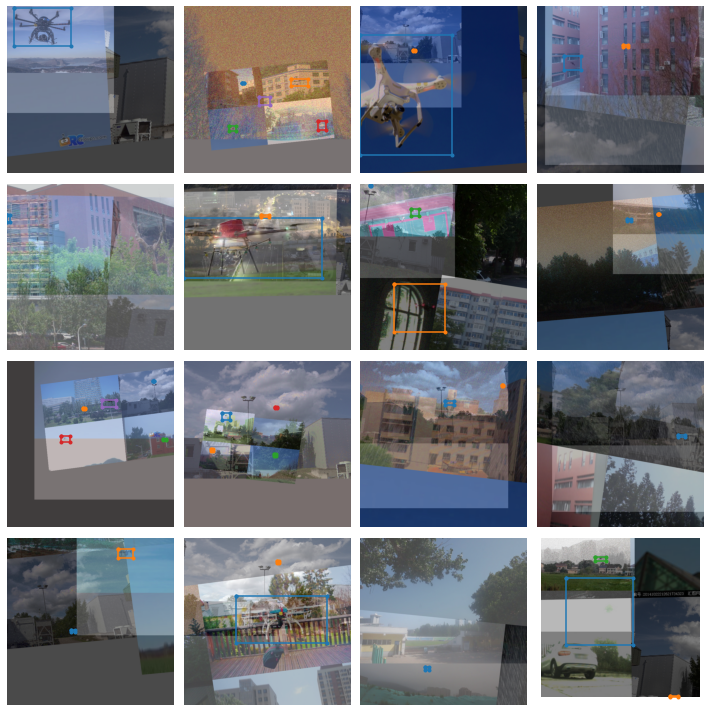

In [36]:
train_data.dataset.plot()

In [52]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    # ENABLING SILENT MODE
    'silent_mode': True,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs": 100,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [10]:
!cp -r /home/g202110550/checkpoints/* /home/g202110550/YoloNas/

In [32]:
# train_params['resume'] = True
train_params["resume_path"] = '/home/g202110550/checkpoints/my_first_yolonas_run/ckpt_latest.pth'
trainer.train(model=model, 
              training_params=train_params, 
              train_loader=train_data, 
              valid_loader=val_data)

[2023-08-17 06:07:18] INFO - checkpoint_utils.py - Successfully loaded model weights from /home/g202110550/checkpoints/my_first_yolonas_run/ckpt_latest.pth checkpoint.
[2023-08-17 06:07:18] WARNING - sg_trainer.py - [WARNING] Main network has been loaded from checkpoint but EMA network exists as well. It  will only be loaded during validation when training with ema=True. 
[2023-08-17 06:07:18] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
2023-08-17 06:07:18.822810: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F AVX512_VNNI
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The console stream is now moved to checkpoints/my_first_yolonas_run/console_Aug17_06_07_18.txt


[2023-08-17 06:07:24] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (2 available on the machine)
    - Dataset size:                 19109      (len(train_set))
    - Batch size per GPU:           16         (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             16         (num_gpus * batch_size)
    - Effective Batch size:         16         (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         1194       (len(train_loader))
    - Gradient updates per epoch:   1194       (len(train_loader) / batch_accumulate)

[2023-08-17 06:07:24] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validation epoch 100:  19%|█▊        | 32/172 [00:06<00:23,  5.90it/s]

In [53]:
from super_gradients.training import models

best_model = models.get('yolo_nas_s',
                        num_classes=2, #len(dataset_params['classes']),
                        checkpoint_path="/home/g202110550/checkpoints/my_first_yolonas_run/ckpt_best.pth")

[2023-08-18 15:20:27] INFO - checkpoint_utils.py - Successfully loaded model weights from /home/g202110550/checkpoints/my_first_yolonas_run/ckpt_best.pth EMA checkpoint.


In [57]:
trainer.test(model=best_model,
            test_loader=val_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1, 
                                                   top_k_predictions=300, 
                                                   num_cls=len(dataset_params['classes']), 
                                                   normalize_targets=True, 
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01, 
                                                                                                          nms_top_k=1000, 
                                                                                                          max_predictions=300,                                                                              
                                                                                                          nms_threshold=0.7)))

Test: 100%|██████████| 172/172 [00:53<00:00,  3.22it/s]


{'Precision@0.50': tensor(0.0656),
 'Recall@0.50': tensor(0.9347),
 'mAP@0.50': tensor(0.8623),
 'F1@0.50': tensor(0.1220)}

In [55]:
!cp -r /home/g202110550/checkpoints/my_first_yolonas_run /home/g202110550/Extended_Yolonas